# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [5]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

##### Checking for null values

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no missing values in the dataset

##### Relationship between Outcome versus predictors

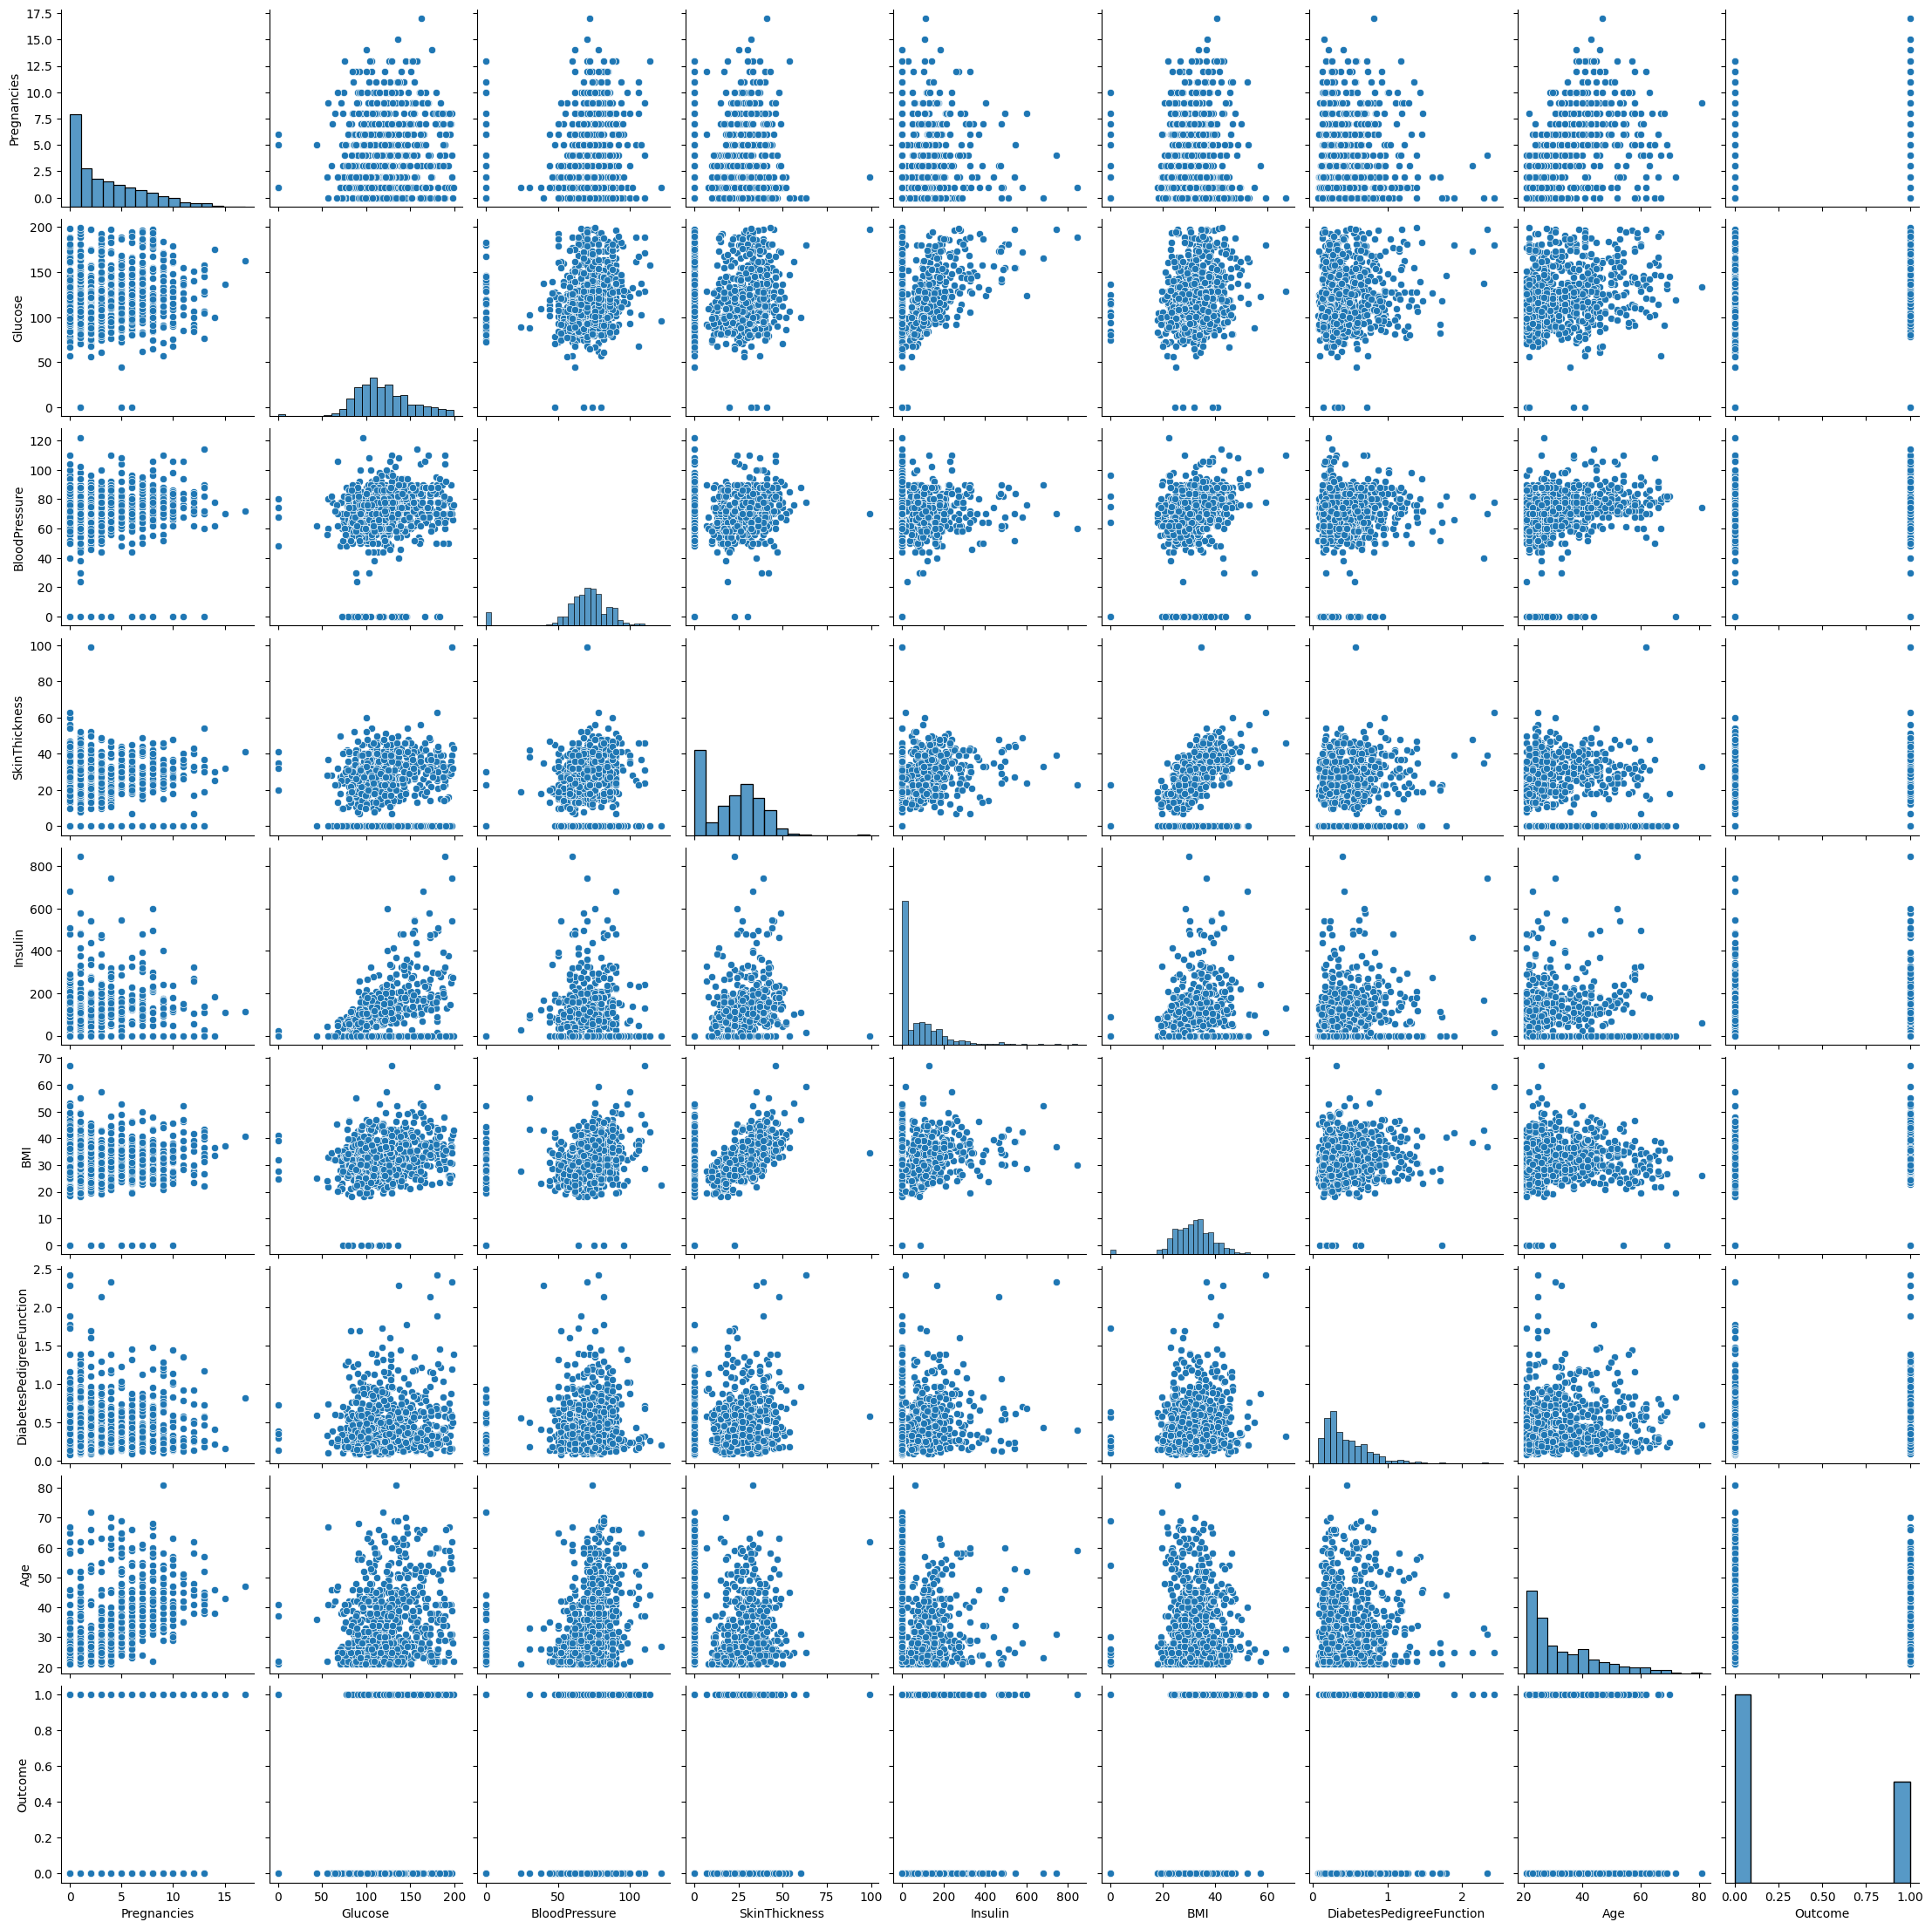

In [4]:
sns.pairplot(df)

<Axes: xlabel='Outcome', ylabel='Age'>

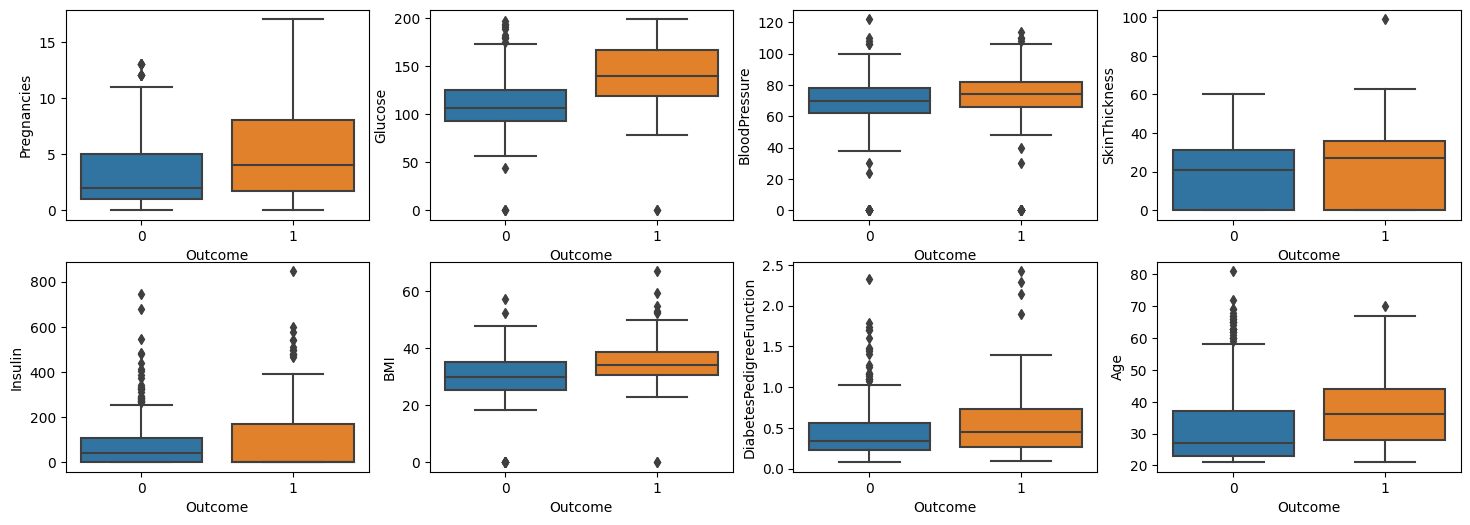

In [61]:
figure, axes = plt.subplots(2, 4, figsize=(18,6))
sns.boxplot(ax=axes[0,0], data=df, y='Pregnancies', x='Outcome')
sns.boxplot(ax=axes[0,1], data=df, y='Glucose', x='Outcome')
sns.boxplot(ax=axes[0,2], data=df, y='BloodPressure', x='Outcome')
sns.boxplot(ax=axes[0,3], data=df, y='SkinThickness', x='Outcome')
sns.boxplot(ax=axes[1,0], data=df, y='Insulin', x='Outcome')
sns.boxplot(ax=axes[1,1], data=df, y='BMI', x='Outcome')
sns.boxplot(ax=axes[1,2], data=df, y='DiabetesPedigreeFunction', x='Outcome')
sns.boxplot(ax=axes[1,3], data=df, y='Age', x='Outcome')

- All the predisctors have a relationship with the outcome. People who has diabetes seem to have a higher value for each of the predictors.

- There are outliers present in data

##### Correlation between predictors

In [8]:
columns = df.columns

<Axes: >

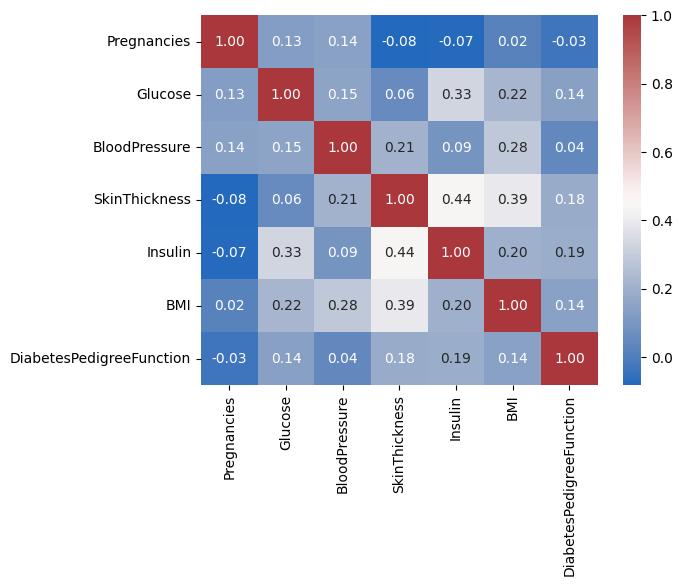

In [9]:
sns.heatmap(df[columns[0:7]].corr(),  annot=True, fmt='.2f', cmap="vlag")

- The highest correlation is between Skin thickness and insulin, second highest is BMI vs skin thickness and third highest is Blood pressure vs BMI. It is interesting that most of the prectors have positive correlation between each other other than pregnancies

##### Distribution of predictor variables

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


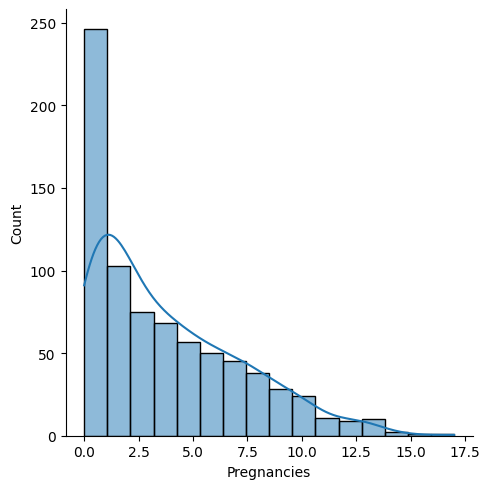

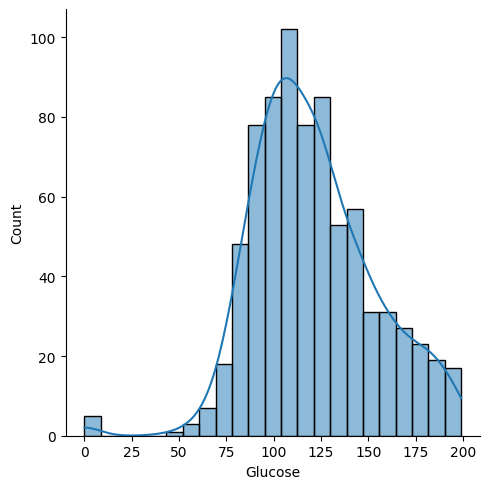

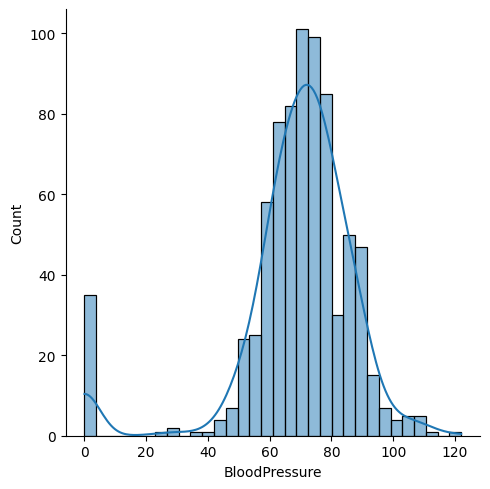

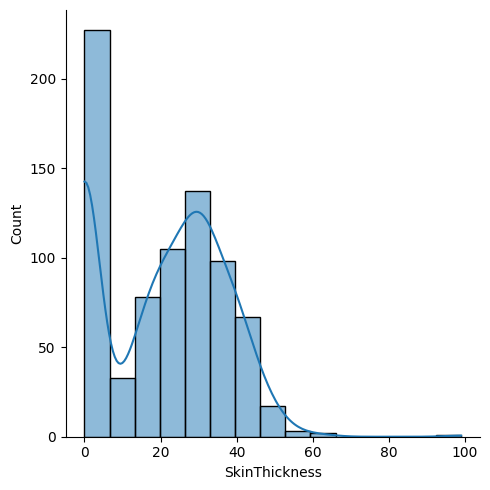

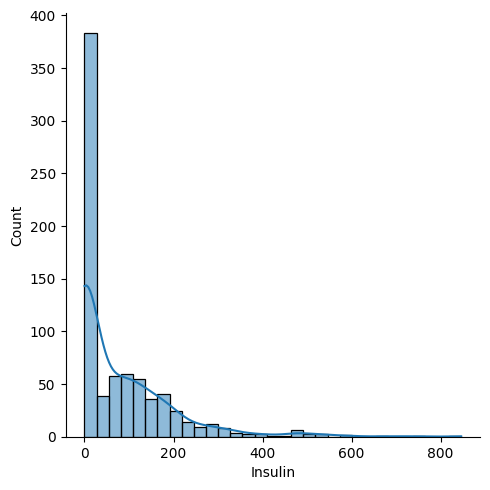

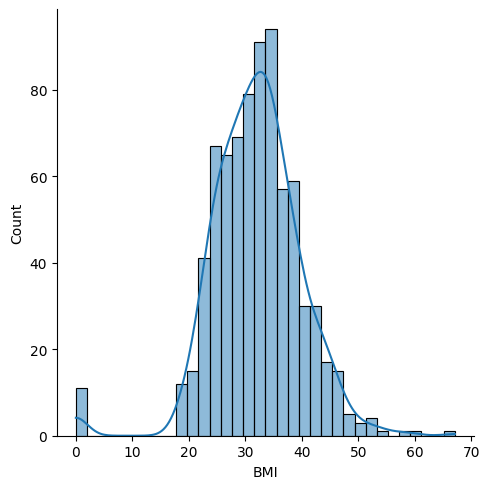

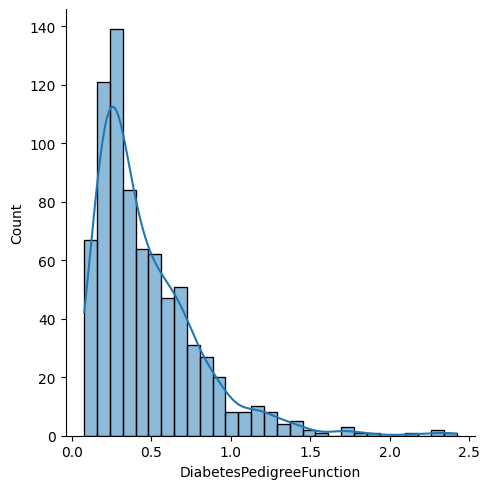

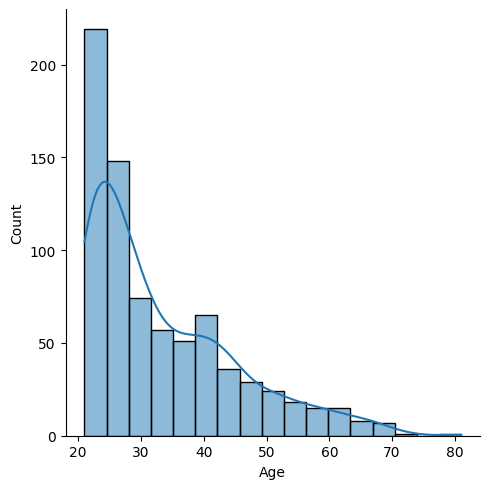

In [66]:
sns.displot( data=df, x='Pregnancies', kde=True)
sns.displot(data=df, x='Glucose', kde=True)
sns.displot(data=df, x='BloodPressure', kde=True)
sns.displot(data=df, x='SkinThickness', kde=True)
sns.displot(data=df, x='Insulin', kde=True)
sns.displot(data=df, x='BMI', kde=True)
sns.displot( data=df, x='DiabetesPedigreeFunction', kde=True)
sns.displot(data=df, x='Age', kde=True)

##### Relationship between predictor variables

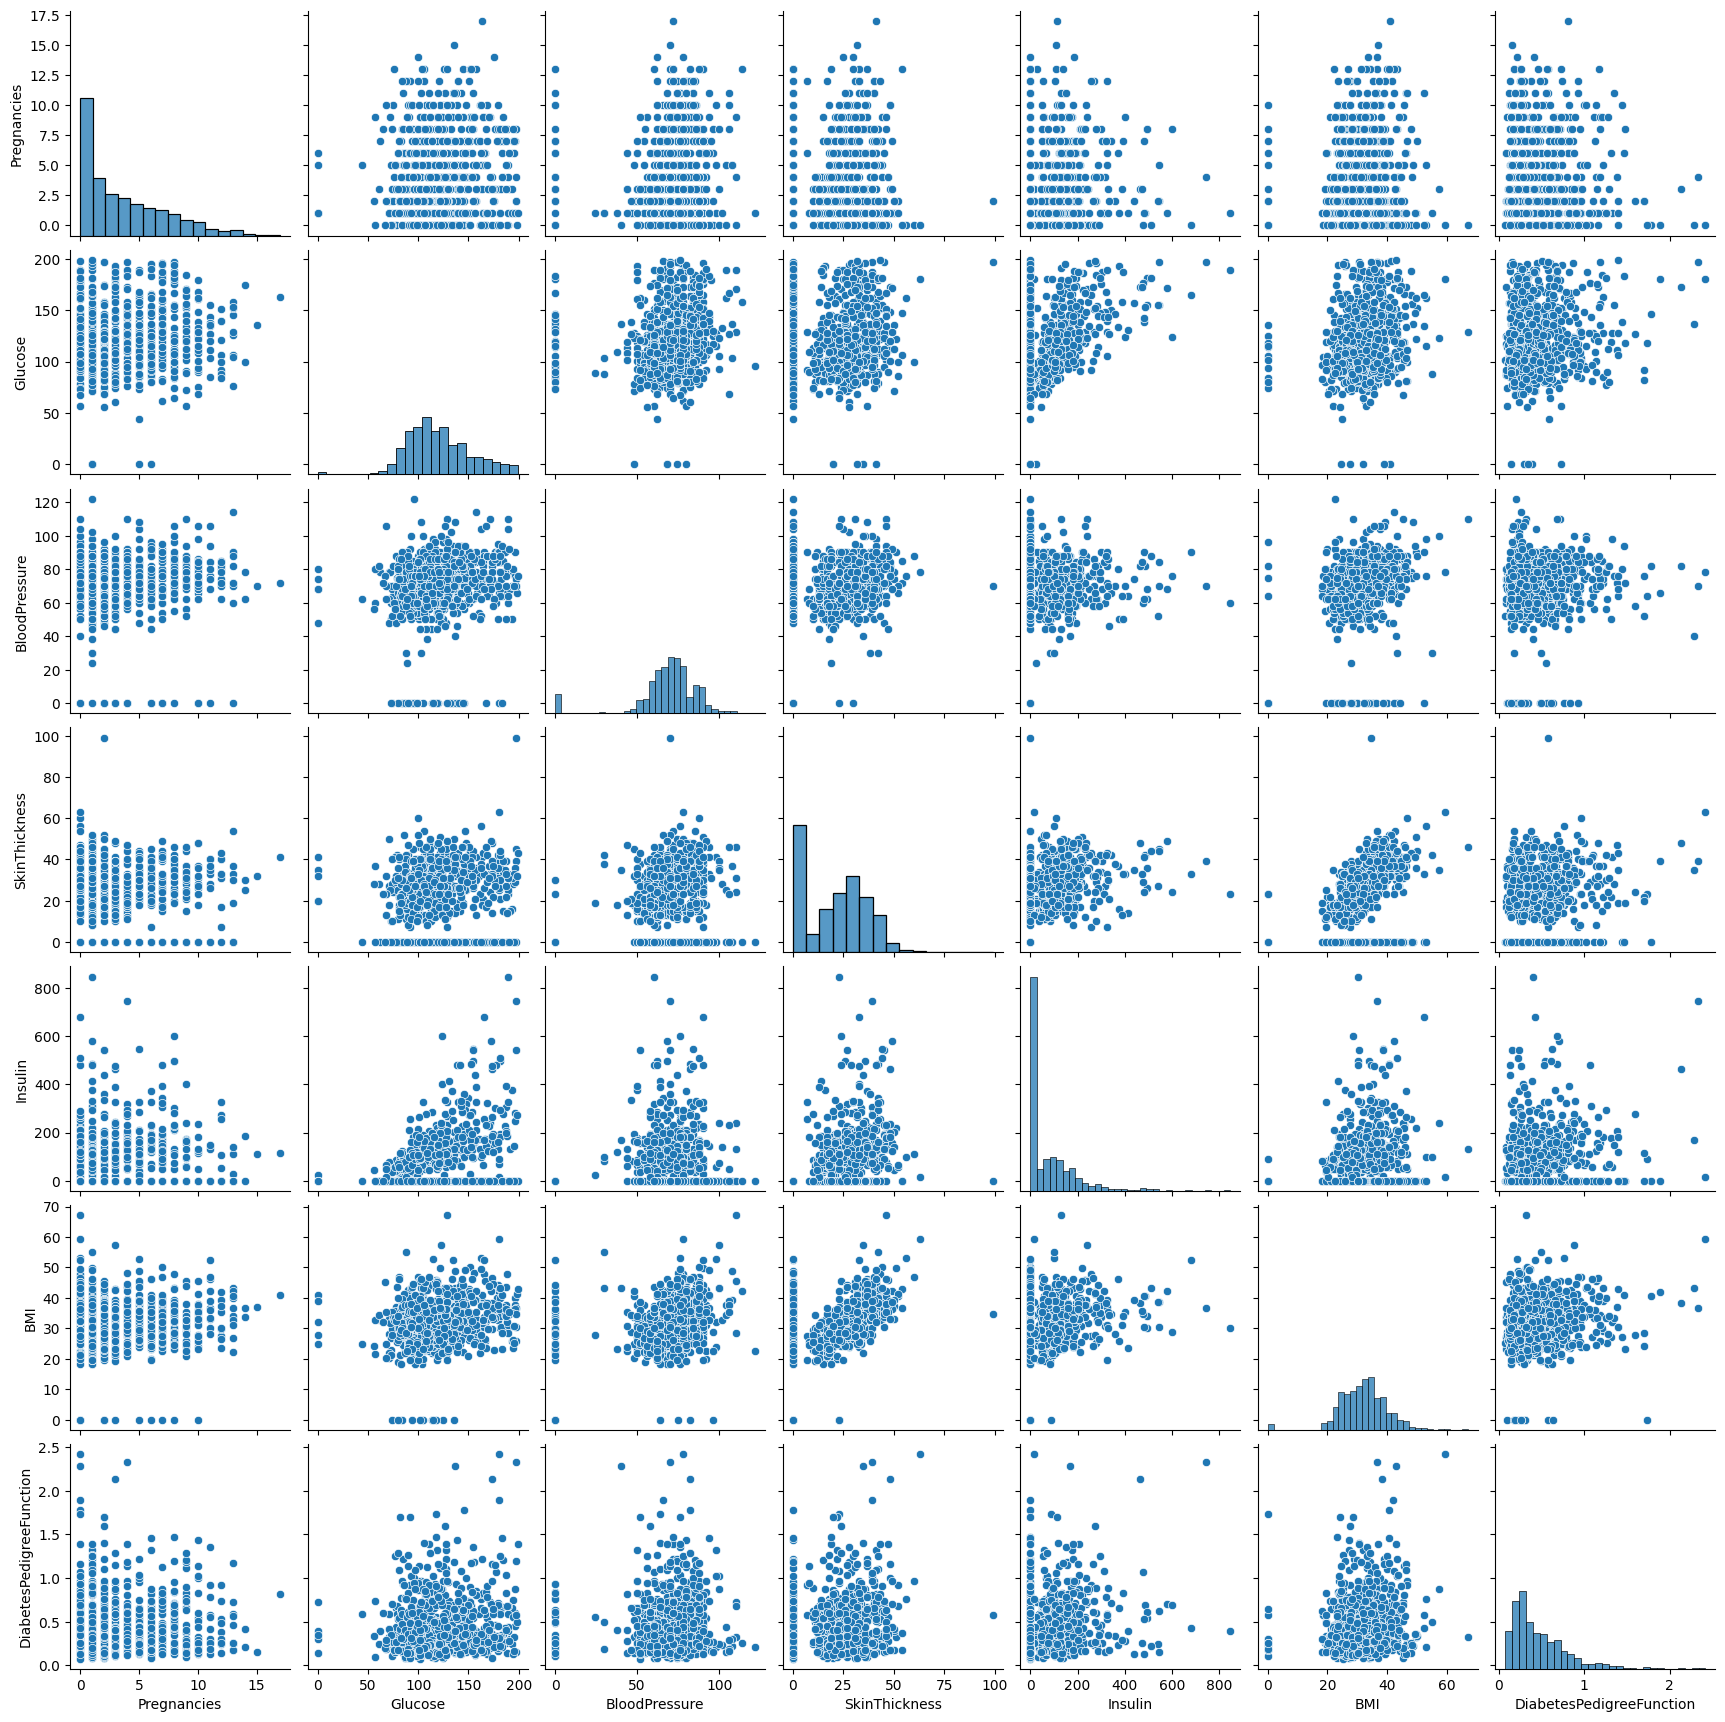

In [68]:
sns.pairplot(df[columns[0:7]])

##### Average Age

In [11]:
round(df.loc[:, 'Age'].mean())

33

##### Average Glucose level of Diabetic vs Non-diabetic

In [12]:
df.groupby(['Outcome'])['Glucose'].mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

##### Average BMI of Diabetic and non-diabetic

In [13]:
df.groupby(['Outcome'])['BMI'].mean()

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

##### Distribution of Diabetic vs Non-Diabetic

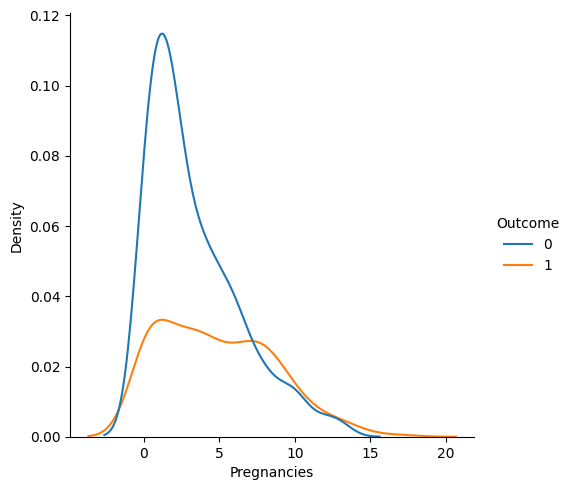

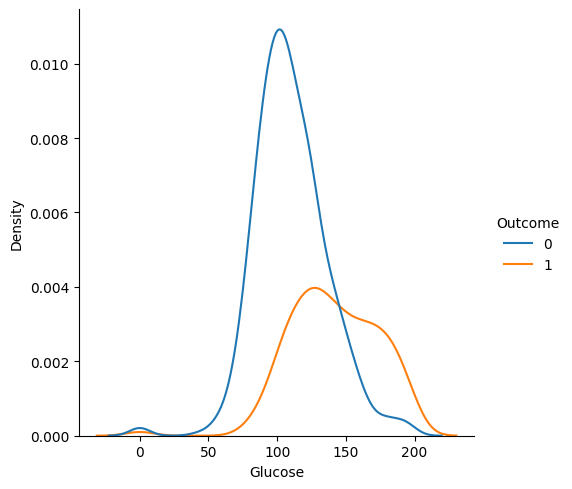

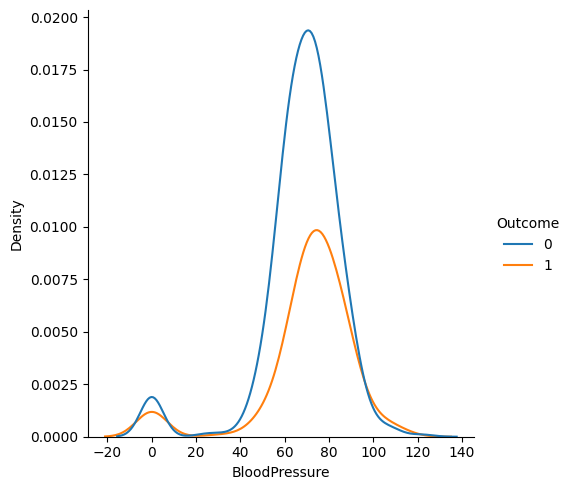

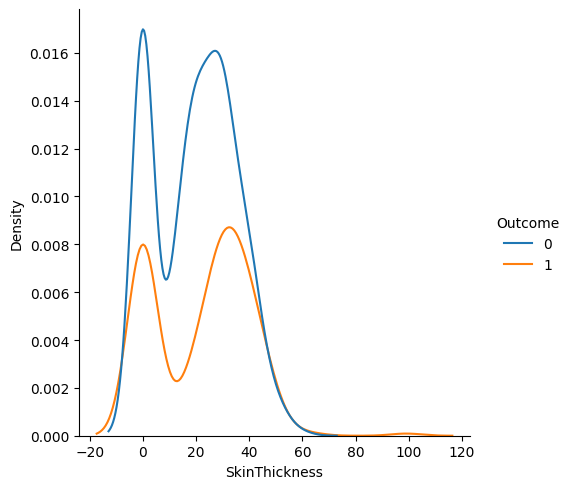

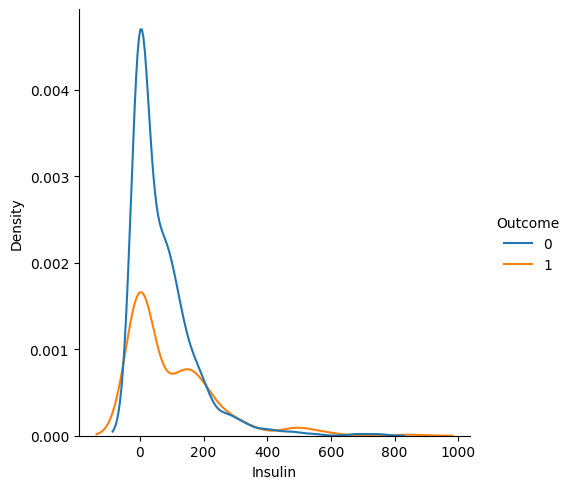

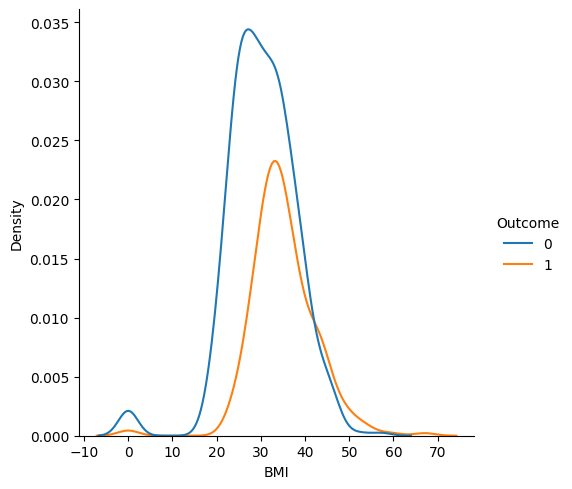

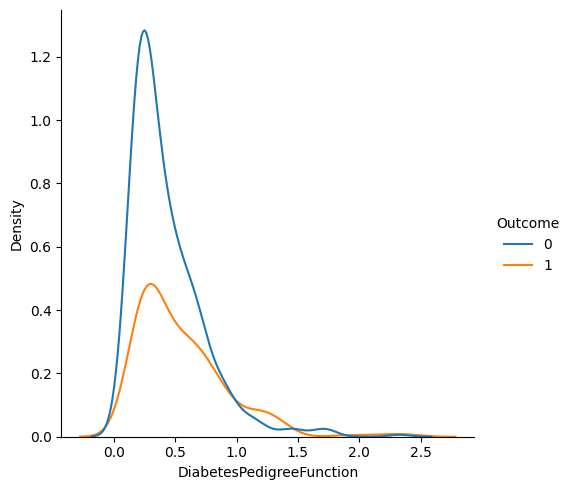

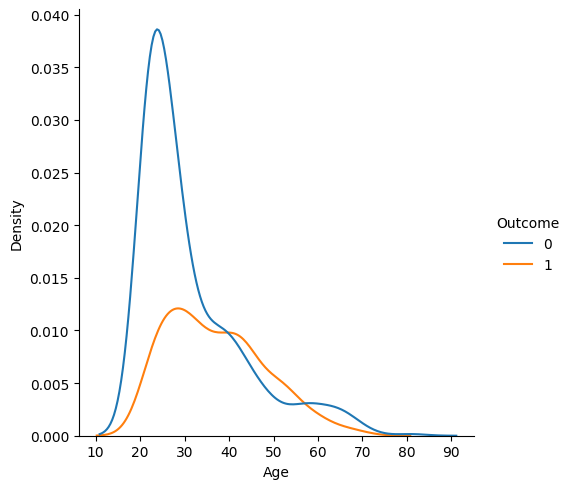

In [76]:
sns.displot( data=df, x='Pregnancies', kind='kde', hue='Outcome')
sns.displot(data=df, x='Glucose', kind='kde', hue='Outcome')
sns.displot(data=df, x='BloodPressure', kind='kde', hue='Outcome')
sns.displot(data=df, x='SkinThickness', kind='kde', hue='Outcome')
sns.displot(data=df, x='Insulin',kind='kde', hue='Outcome')
sns.displot(data=df, x='BMI',kind='kde', hue='Outcome')
sns.displot( data=df, x='DiabetesPedigreeFunction', kind='kde', hue='Outcome')
sns.displot(data=df, x='Age', kind='kde', hue='Outcome')

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [14]:
df_copy = df.copy()
df_copy.loc[df_copy['Glucose'] == 0, 'Glucose'] = df.loc[:, 'Glucose'].mean()
df_copy.loc[df_copy['SkinThickness'] == 0, 'SkinThickness'] = df.loc[:, 'SkinThickness'].mean()
df_copy.loc[df_copy['Insulin'] == 0, 'Insulin'] = df.loc[:, 'Insulin'].mean()
df_copy.loc[df_copy['BMI'] == 0, 'BMI'] = df.loc[:, 'BMI'].mean()
df_copy.loc[df_copy['BloodPressure'] == 0, 'BloodPressure'] = df.loc[:, 'BloodPressure'].mean()
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [15]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


In [16]:
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
scaler = StandardScaler() 
df_scaled = pd.DataFrame(scaler.fit_transform(df_copy.copy()))

In [18]:
df_scaled

,0,1,2,3,4,5,6,7,8
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995,1.365896
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672,-0.732120
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584,1.365896
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309315,2.222711,0.659428,0.065376,-0.908682,2.532136,-0.732120
764,-0.547919,0.010468,-0.186224,0.040885,-0.417768,0.632988,-0.398282,-0.531023,-0.732120
765,0.342981,-0.022409,-0.021044,-0.374700,-0.071599,-0.909751,-0.685193,-0.275760,-0.732120
766,-0.844885,0.141977,-1.012121,-0.630654,-0.417768,-0.342140,-0.371101,1.170732,1.365896


In [19]:
df_scaled.columns = columns
print(df_scaled.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [20]:
ones_subset = df_copy.loc[df["Outcome"] == 1, :]
number_of_1s = len(ones_subset)

print(number_of_1s)

268


In [21]:
zeros_subset = df_copy.loc[df["Outcome"] == 0, :]
number_of_0s = len(zeros_subset)

print(number_of_0s)

500


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [30]:
X = df_scaled[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] # For This Tutorial , we are going to stick to Sex,Age,Cabin and Fare

y = df_copy['Outcome']

In [31]:
predictors = pd.DataFrame([df_scaled['Pregnancies'], df_scaled['Glucose'], df_scaled['BloodPressure'], 
                           df_scaled['SkinThickness'], df_scaled['Insulin'],
                            df_scaled['BMI'], df_scaled['DiabetesPedigreeFunction'], df_scaled['Age']]).T

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size = 0.12, random_state = 42)

#### Random Forest Classifier Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


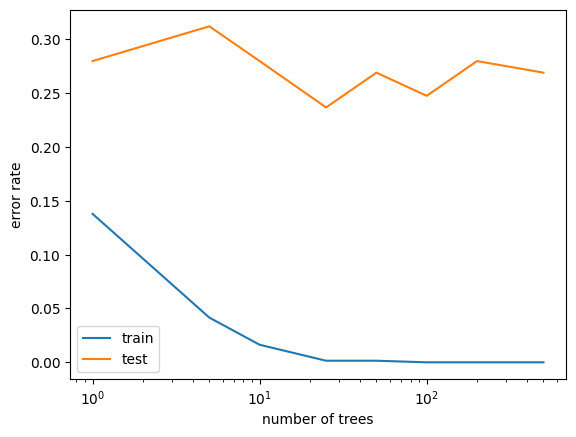

In [33]:
def make_num_tree_plot(X_train, y_train, X_test, y_test, num_trees):
    """
    Make number of trees vs error rate plot for RandomForestClassifier

    Parameters
    ----------
    X_train: numpy.ndarray
        The X part of the train set
    y_train: numpy.ndarray
        The y part of the train set
    X_test: numpy.ndarray
        The X part of the test/validation set
    y_test: numpy.ndarray
        The y part of the test/validation set
    num_trees: int
        The value for `n_estimators` argument of RandomForestClassifier
    Returns
    -------
        None
        Shows the number of trees vs error rate plot

    """
    train_err = []
    test_err = []
    for ntree in num_trees:
        model = RandomForestClassifier(n_estimators=ntree)
        model.fit(X_train, y_train)
        train_err.append(1-model.score(X_train, y_train))
        test_err.append(1-model.score(X_test, y_test))

    fig, ax = plt.subplots()
    ax.plot(num_trees,train_err,label="train")
    ax.plot(num_trees,test_err,label="test")
    ax.set_xlabel('number of trees');
    ax.set_ylabel('error rate');
    ax.set_xscale('log')
    ax.legend()
    plt.show()
    
#fit a random forest for various n_estimators and plot the error
make_num_tree_plot(X_train, y_train, X_test, y_test, (1,5,10,25,50,100,200,500))

In [34]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
e_pred = model.predict(X_test)
e_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [36]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, e_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, e_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, e_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, e_pred)
print('F1 score: %f' % f1)
# 
auc = roc_auc_score(y_test,e_pred)
print('ROC-AUC score: %f' % auc)

Accuracy: 0.752688
Precision: 0.628571
Recall: 0.687500
F1 score: 0.656716
ROC-AUC score: 0.737193


#### Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression

# Fit the model on training set
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [39]:
# predict probabilities for test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [40]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
# 
auc = roc_auc_score(y_test,y_pred)
print('ROC-AUC score: %f' % auc)

Accuracy: 0.698925
Precision: 0.547619
Recall: 0.718750
F1 score: 0.621622
ROC-AUC score: 0.703637


#### Cross-validation

In [41]:
from sklearn.metrics import r2_score
# Make the folds
k_folds = 10

X_folds, y_folds = np.array_split(X, k_folds), np.array_split(y, k_folds)

fold_sizes = ', '.join([str(len(f)) for f in X_folds])
print(f'The folds are of type {type(X_folds)} and contain {fold_sizes} data points')

The folds are of type <class 'list'> and contain 77, 77, 77, 77, 77, 77, 77, 77, 76, 76 data points


In [42]:
# List that will accumulate test performance on each fold
cv_r2 = []

for i in range(k_folds):
    # Make the train/test set for this fold
    X_test = X_folds[i]
    y_test = y_folds[i]
    X_train = [X_folds[j] for j in range(k_folds) if j != i]
    y_train = [y_folds[j] for j in range(k_folds) if j != i]
    X_train = np.concatenate(X_train)
    y_train = np.concatenate(y_train)

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    cv_r2.append(r2)

print(cv_r2)

[-0.3368055555555558, 0.1090909090909089, -0.053351573187414125, -0.3106382978723403, -0.08370370370370384, -0.03758865248226928, -0.30952380952380976, 0.3484615384615384, -0.09615384615384603, 0.008695652173912882]


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Logis

In [43]:
# Get the mean and standard deviation of the cross-validation test set performance across folds
cv_r2 = np.array(cv_r2)
print(f'Cross-validated R^2\nMean:\t{cv_r2.mean()}\nStd.:\t{cv_r2.std()}')

Cross-validated R^2
Mean:	-0.0761517338752579
Std.:	0.20041489745002855


- According to accuracy, precision, ROC-AUC and f1 score  scores the random forest classification model is better at classifying. However according to recall Logistic regression model is better. As roc-auc curve is better at doing binary classification in this case (TPR and FPR) we can conclude that the random forest model is better.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- All the predictors have a relationship with the outcome. People who has diabetes seem to have a higher value for each of the predictors.
- The highest correlation is between Skin thickness and insulin, second highest is BMI vs skin thickness and third highest is Blood pressure vs BMI. It is interesting that most of the predictors have positive correlation between each other other than pregnancies.
- The mean glucose level for diabetic people is 141 and non-diabetic people is 110.
- According to accuracy, precision, ROC-AUC and f1 score  scores the random forest classification model is better at classifying. However according to recall Logistic regression model is better. As roc-auc curve is better at doing binary classification in this case (TPR and FPR) we can conclude that the random forest model is better.